In [1]:
import matplotlib.pyplot as plt
import os as os
import sys
import numpy as np

## Plot Histogram

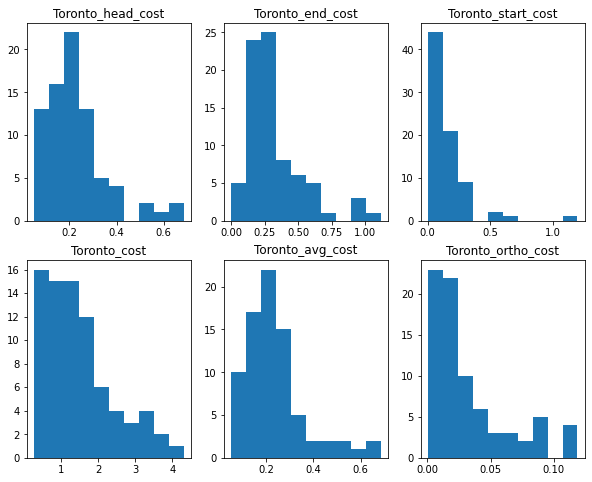

In [2]:
cost_list = ['Toronto_head_cost.txt', 'Toronto_end_cost.txt','Toronto_start_cost.txt', 'Toronto_cost.txt','Toronto_avg_cost.txt', 'Toronto_ortho_cost.txt']
ncols = int((len(cost_list)+1) / 2)
nrows = 2
fig, axs = plt.subplots(nrows, ncols)

for idx, cost_file in enumerate(cost_list):
    with open(cost_file) as f:
        lines = f.readlines()
    cost_vals = [float(x[:-1]) for x in lines]
    i = int(idx / (nrows+1))
    j = int(idx % ncols)
    axs[i, j].set_title(cost_file.split('.')[0])
    axs[i, j].hist(cost_vals)
fig.set_size_inches(10, 8)

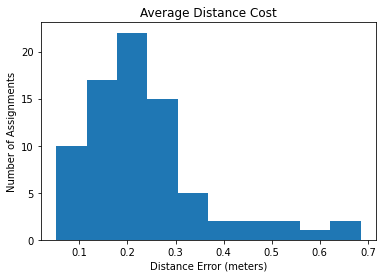

In [9]:
cost_avg = 'Toronto_avg_cost.txt'
cost_ortho ='Toronto_ortho_cost.txt'

with open(cost_avg) as f:
    lines = f.readlines()
cost_vals = [float(x[:-1]) for x in lines]
plt.title("Average Distance Cost")
plt.xlabel("Distance Error (meters)")
plt.ylabel("Number of Assignments")
plt.hist(cost_vals)
plt.savefig('avg_cost.png')

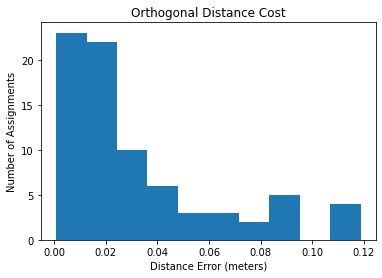

In [10]:
cost_ortho ='Toronto_ortho_cost.txt'

with open(cost_ortho) as f:
    lines = f.readlines()
cost_vals = [float(x[:-1]) for x in lines]
plt.title("Orthogonal Distance Cost")
plt.xlabel("Distance Error (meters)")
plt.ylabel("Number of Assignments")
plt.hist(cost_vals)
plt.savefig('ortho_cost.png')

## Getting number of assigned Ground Truth

In [11]:
gt_file = 'num_GT.txt'
assigned_file = 'num_assigned.txt'

with open(gt_file) as f:
    lines = f.readlines()
    num_gt = [float(x[:-1]) for x in lines]
    
with open(assigned_file) as f:
    lines = f.readlines()
    num_assigned = [float(x[:-1]) for x in lines]
    
print("Total number of assigned dashed markings in all samples: ", sum(num_assigned) / sum(num_gt))

Total number of assigned dashed markings in all samples:  0.6842105263157895


In [12]:
for idx, [i_gt, i_pred] in enumerate(zip(num_gt, num_assigned)):
    print("Percentage of Assigned to GT of sample {} is {} ".format(idx+1, i_pred / i_gt))

Percentage of Assigned to GT of sample 1 is 0.8181818181818182 
Percentage of Assigned to GT of sample 2 is 0.25 
Percentage of Assigned to GT of sample 3 is 0.8 
Percentage of Assigned to GT of sample 4 is 0.8461538461538461 
Percentage of Assigned to GT of sample 5 is 0.75 
Percentage of Assigned to GT of sample 6 is 0.5833333333333334 
Percentage of Assigned to GT of sample 7 is 1.0 
Percentage of Assigned to GT of sample 8 is 0.5714285714285714 
Percentage of Assigned to GT of sample 9 is 0.5 
Percentage of Assigned to GT of sample 10 is 0.5555555555555556 


## Reading Point Cloud from .BIN files and convert it into .PCD

In [19]:
dir_pc = '/home/nabdyj/Downloads/00_42_accum_velodyne_points'
bin_files = os.listdir(dir_pc)
for bin_file in bin_files:
    with open (os.path.join(dir_pc,bin_file), "rb") as f:
        byte = f.read(size_float*4)
        while byte:
            x,y,z,intensity = struct.unpack("ffff", byte)
            list_pcd.append([x, y, z])
            byte = f.read(size_float*4)
    np_pcd = np.asarray(list_pcd)
    pcd = o3d.geometry.PointCloud()
    v3d = o3d.utility.Vector3dVector
    pcd.points = v3d(np_pcd)

NameError: name 'size_float' is not defined